In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('sample_reviews.csv')

In [ ]:
# Encode the target variable 'label' into numerical format
df['label_encoded'] = df['label'].apply(lambda x: 1 if x == 'CG' else 0)

In [ ]:
import string
import enchant
# Initialize the English dictionary
dictionary = enchant.Dict("en_US")

def count_typos(review):
    # Remove punctuation and split into words
    words = review.translate(str.maketrans('', '', string.punctuation)).split()
    # Count words that are not in the dictionary
    return sum(1 for word in words if not dictionary.check(word))

# Function to count punctuation characters in a review
def count_punctuation(review):
    return sum(1 for char in review if char in string.punctuation)

In [ ]:
# Add the numerical columns back to the original df
df['typo_count'] = df['text_'].apply(count_typos)
df['punctuation_count'] = df['text_'].apply(count_punctuation)
df['avg_word_length'] = df['text_'].apply(lambda x: np.mean([len(word) for word in x.split()]) if len(x.split()) > 0 else 0)
df['review_length'] = df['text_'].str.len()

# Display the updated DataFrame
print(df[['text_', 'typo_count', 'punctuation_count', 'avg_word_length', 'review_length']].head())

                                               text_  typo_count  \
0  Love this!  Well made, sturdy, and very comfor...           1   
1  love it, a great upgrade from the original.  I...           1   
2  This pillow saved my back. I love the look and...           0   
3  Missing information on how to use it, but it i...           0   
4  Very nice set. Good quality. We have had the s...           0   

   punctuation_count  avg_word_length  review_length  
0                  5         5.166667             75  
1                  3         4.000000             80  
2                  2         3.857143             67  
3                  2         3.764706             81  
4                  2         3.777778             85  


In [ ]:
# Define the features (X) and target (y)
X = df[['rating', 'typo_count', 'punctuation_count', 'avg_word_length', 'review_length']]
y = df['label_encoded']

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 1: First split — hold out 10% for test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

# Step 2: Second split — split remaining 90% into 80% train and 10% val
# Since X_temp is 90%, we want to split off 1/9 ≈ 0.1111 to get 10% of the original data
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=1/9, random_state=42, stratify=y_temp
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:

from sklearn.linear_model import LogisticRegression


# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_val)

# Evaluate the model
acc_logreg = accuracy_score(y_val, y_pred)
print("Accuracy:", acc_logreg)
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.647131552917903

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.60      0.63      2022
           1       0.64      0.69      0.66      2022

    accuracy                           0.65      4044
   macro avg       0.65      0.65      0.65      4044
weighted avg       0.65      0.65      0.65      4044



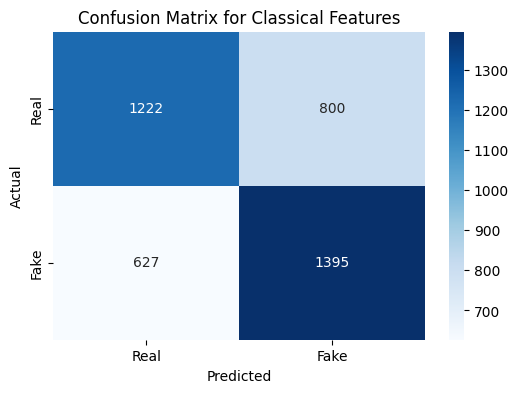

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Classical Features")
plt.show()

In [ ]:

from sklearn.ensemble import RandomForestClassifier


# Initialize and train the logistic regression model
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rand_forest.predict(X_val)

# Evaluate the model
acc_randfor = accuracy_score(y_val, y_pred)
print("Accuracy:", acc_randfor)
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.6834817012858556

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69      2022
           1       0.69      0.67      0.68      2022

    accuracy                           0.68      4044
   macro avg       0.68      0.68      0.68      4044
weighted avg       0.68      0.68      0.68      4044



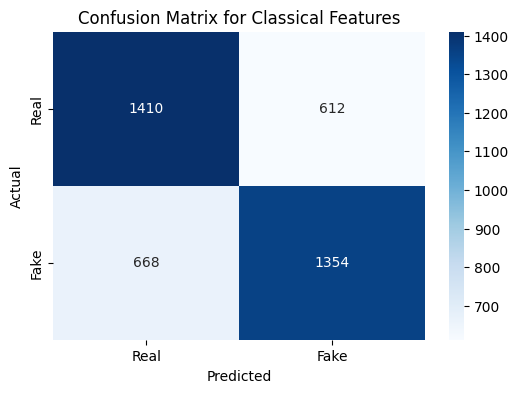

In [ ]:

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Classical Features")
plt.show()

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier


# Initialize and train the logistic regression model
grad_booster = GradientBoostingClassifier(random_state=42)
grad_booster.fit(X_train, y_train)

# Make predictions on the test set
y_pred = grad_booster.predict(X_val)

# Evaluate the model
acc_gradboost = accuracy_score(y_val, y_pred)
print("Accuracy:", acc_gradboost)
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.718595450049456

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.70      0.71      2022
           1       0.71      0.74      0.72      2022

    accuracy                           0.72      4044
   macro avg       0.72      0.72      0.72      4044
weighted avg       0.72      0.72      0.72      4044



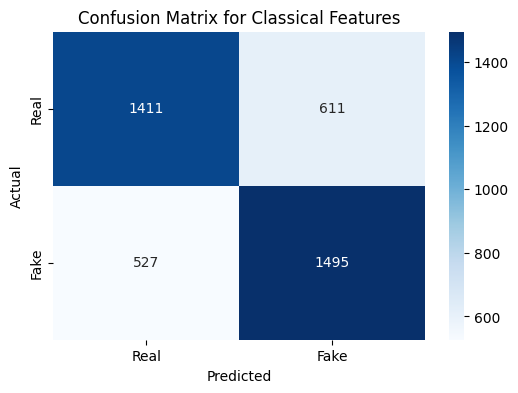

In [ ]:

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Classical Features")
plt.show()

In [ ]:

from sklearn.svm import SVC


# Initialize and train the logistic regression model
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_val)

# Evaluate the model
acc_svm = accuracy_score(y_val, y_pred)
print("Accuracy:", acc_svm)
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.6810089020771514

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.65      0.67      2022
           1       0.67      0.71      0.69      2022

    accuracy                           0.68      4044
   macro avg       0.68      0.68      0.68      4044
weighted avg       0.68      0.68      0.68      4044



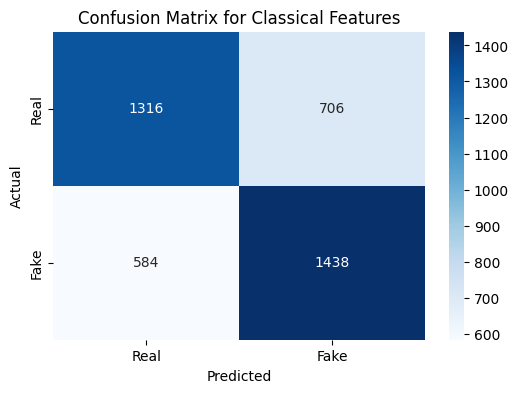

In [ ]:

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Classical Features")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# Initialize and train the logistic regression model
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_val)

# Evaluate the model
acc_knn = accuracy_score(y_val, y_pred)
print("Accuracy:", acc_knn)
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.6812561819980217

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.65      0.67      2022
           1       0.67      0.72      0.69      2022

    accuracy                           0.68      4044
   macro avg       0.68      0.68      0.68      4044
weighted avg       0.68      0.68      0.68      4044



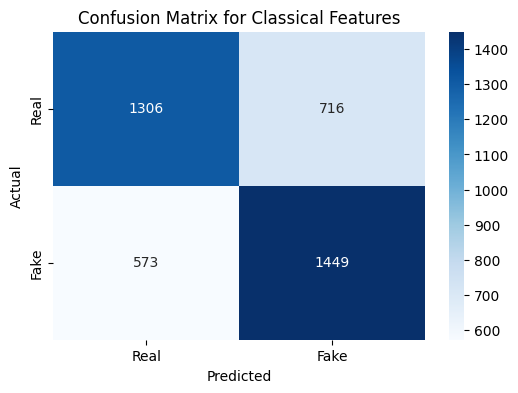

In [ ]:

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Classical Features")
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB


# Initialize and train the logistic regression model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_val)

# Evaluate the model
acc_nb = accuracy_score(y_val, y_pred)
print("Accuracy:", acc_nb)
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.5373392680514342

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.22      0.33      2022
           1       0.52      0.85      0.65      2022

    accuracy                           0.54      4044
   macro avg       0.56      0.54      0.49      4044
weighted avg       0.56      0.54      0.49      4044



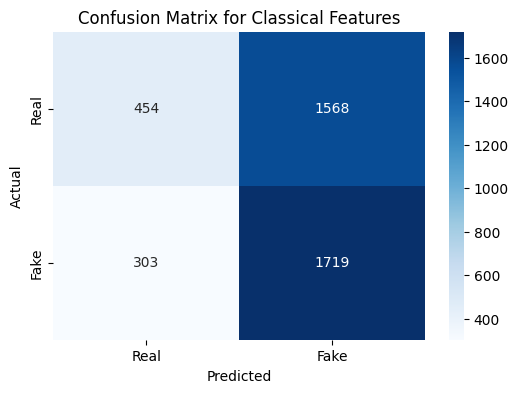

In [ ]:

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Classical Features")
plt.show()

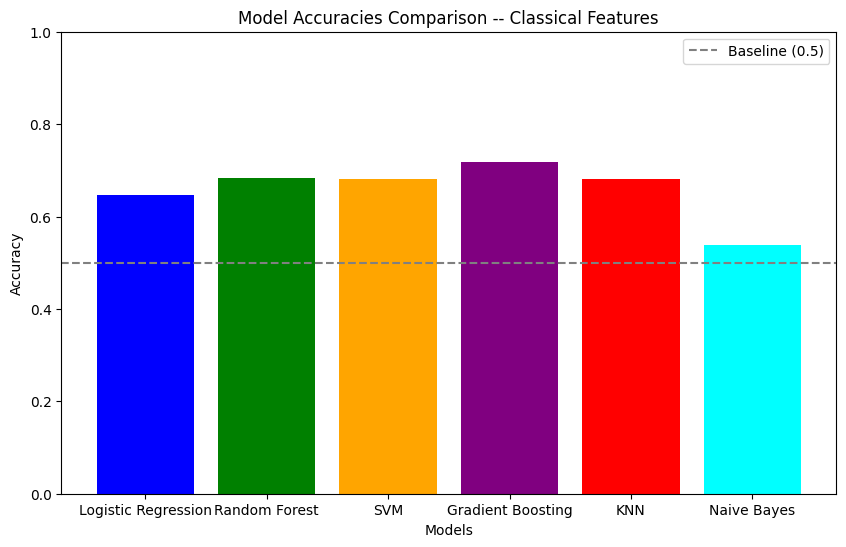

In [ ]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'KNN', 'Naive Bayes']
accuracies = [acc_logreg, acc_randfor, acc_svm, acc_gradboost, acc_knn, acc_nb]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'purple', 'red', 'cyan'])
plt.axhline(y=0.5, color='gray', linestyle='--', label='Baseline (0.5)')  # Add baseline
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies Comparison -- Classical Features')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for better visualization
plt.legend()
plt.show()